In [17]:
pwd

'C:\\Users\\jibra\\Downloads\\cmder'

In [ ]:
#questions to ask: 1) python not showing any of the images below. is some package/environment missing?
# 2) POI df not working
# 3) assuming Github repository is best way to store/collaborate on this?
# 4) any other best practices for 

#zillow needs a folder

In [66]:
#download packages
import numpy as np
import geopandas as gpd
import pandana as pnda
from pandana.loaders import osm
import osmnx as ox
import altair as alt
alt.renderers.enable('notebook')
%matplotlib inline

In [32]:
!pip install matplotlib

In [65]:
#trying to read all Zillow neighborhoods
zillowNY = gpd.read_file("zillowdata/ZillowNeighborhoods-NY")
# does this need to be just .shp or .dbf? having issues getting this to load

DriverError: zillowdata/ZillowNeighborhoods-NY: No such file or directory

In [51]:
#read shpfile of zillow NY neighborhoods
zillowSHP = gpd.read_file("zillowdata/ZillowNeighborhoods-NY.shp")

In [52]:
#shpfile of all NY neighborhoods
zillowSHP

,State,County,City,Name,RegionID,geometry
0,NY,Suffolk,Town of Islip,Bohemia,3736,POLYGON ((-73.14422599999978 40.78667100000015...
1,NY,Albany,Town of Coeymans,Ravena,6687,POLYGON ((-73.82263299999994 42.50202800000005...
2,NY,Queens,New York,Rego Park,6719,POLYGON ((-73.85629999999999 40.72303000000012...
3,NY,Suffolk,Town of Islip,Saltaire,6912,POLYGON ((-73.18890699999992 40.63929400000006...
4,NY,Albany,Guilderland,Westmere,9545,POLYGON ((-73.87197712899996 42.69915614600006...
5,NY,Queens,New York,Belle Harbor,10329,POLYGON ((-73.85618223699993 40.56810940300005...
6,NY,Westchester,Somers,Shenorock,13814,POLYGON ((-73.73499899999996 41.33642600000007...
7,NY,Rockland,Orangetown,South Nyack,16206,POLYGON ((-73.91816399999993 41.08704600000004...
8,NY,Suffolk,Town of Islip,East Islip,17876,"POLYGON ((-73.155265 40.74679, -73.156184 40.7..."
9,NY,Suffolk,Huntington,Huntington Bay,18662,POLYGON ((-73.38813899999991 40.91146300000008...


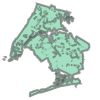

In [54]:
ManhattanBKBronxQueens = zillowSHP.geometry.unary_union
ManhattanBKBronxQueens

In [55]:
G_NYC = ox.graph_from_polygon(ManhattanBKBronxQueens, 
                                          network_type='drive')

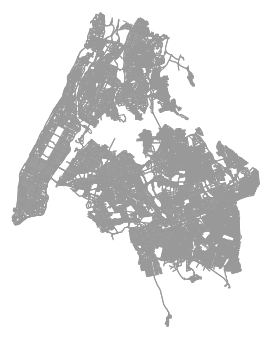

In [67]:
ox.plot_graph(ox.project_graph(G_NYC), node_size=0);

In [57]:
ox.basic_stats(G_NYC)

{'n': 31989,
 'm': 82180,
 'k_avg': 5.138016193066367,
 'intersection_count': 30501,
 'streets_per_node_avg': 3.383569351964738,
 'streets_per_node_counts': {0: 0,
  1: 1488,
  2: 132,
  3: 15502,
  4: 14418,
  5: 392,
  6: 53,
  7: 3,
  8: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.04651598987151834,
  2: 0.004126418456344368,
  3: 0.4846040826534121,
  4: 0.45071743411797804,
  5: 0.012254212385507519,
  6: 0.0016568195317140267,
  7: 9.378223764419019e-05,
  8: 3.126074588139673e-05},
 'edge_length_total': 9544716.453000085,
 'edge_length_avg': 116.1440308225856,
 'street_length_total': 6577270.906999995,
 'street_length_avg': 121.80582441942285,
 'street_segments_count': 53998,
 'node_density_km': None,
 'intersection_density_km': None,
 'edge_density_km': None,
 'street_density_km': None,
 'circuity_avg': 1.0195395988487022,
 'self_loop_proportion': 0.001362862010221465,
 'clean_intersection_count': None,
 'clean_intersection_density_km': None}

In [28]:
nyc = ox.gdf_from_place('New York, NY, USA')
nyc.head()

,bbox_east,bbox_north,bbox_south,bbox_west,geometry,place_name
0,-73.700181,40.916179,40.477399,-74.25909,"(POLYGON ((-74.25909 40.497207, -74.259028 40....","New York City, New York, USA"


In [29]:
nyc.to_crs(epsg=3857).plot(facecolor='none', edgecolor='black') 

In [34]:
nycvisual = ox.plot_shape(ox.project_gdf(nyc));
nycvisual

(<Figure size 600x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x293cc9e4cc0>)

In [53]:
NYCzillow = zillowSHP['County'].isin(['New York', 'Brooklyn', 'Bronx', 'Queens'])
zillowSHP = zillowSHP.loc[NYCzillow]
zillowSHP.head(100)

,State,County,City,Name,RegionID,geometry
2,NY,Queens,New York,Rego Park,6719,POLYGON ((-73.85629999999999 40.72303000000012...
5,NY,Queens,New York,Belle Harbor,10329,POLYGON ((-73.85618223699993 40.56810940300005...
10,NY,New York,New York,Roosevelt Island,20239,POLYGON ((-73.96143117599991 40.74851331600007...
13,NY,Queens,New York,Howard Beach,21970,POLYGON ((-73.85608525799972 40.65037135900031...
16,NY,Queens,New York,Breezy Point,37557,POLYGON ((-73.90962826099991 40.56552556300005...
21,NY,Queens,New York,Neponsit,42662,POLYGON ((-73.85990620999991 40.56700771800007...
23,NY,Queens,New York,East Elmhurst,45032,POLYGON ((-73.86286955999992 40.76695847800005...
25,NY,Bronx,New York,West Farms,48417,POLYGON ((-73.87729106686085 40.84245433729515...
27,NY,Queens,New York,Cambria Heights,50348,POLYGON ((-73.73909357074226 40.70117794641342...
33,NY,Queens,New York,Fresh Meadows,4819,"POLYGON ((-73.7699123773972 40.74150740314482,..."


In [3]:
osm.node_query? #use osm.node_query to extract amenities within a given bounding box

In [49]:
ox.plot_shape(zillowSHP.to_crs(epsg=3857));

In [58]:
boundary = ManhattanBKBronxQueens.bounds
boundary

(-74.04728499999993, 40.54082267800004, -73.70027199999993, 40.91577113100004)

In [59]:
[lng_min, lat_min, lng_max, lat_max] = boundary

In [64]:
# query OSM
poi_df = osm.node_query(lat_min, lng_min, lat_max, lng_max)

# remove missing data
#poi_df = poi_df.dropna(subset=['amenity'])

MemoryError: 